# New York City Taxi Fare Prediction

**Problem Statement:**

The New York City Taxi Fare Prediction challenge is a regression problem where the goal is to predict the fare amount (in USD) that a passenger will have to pay for a taxi ride in New York City, based on certain information available at the start of the ride.

 Historical dataset that includes:

- Pickup date and time

- Pickup location (latitude and longitude)

- Drop-off location (latitude and longitude)

- Passenger count


The task is to use this information to accurately predict the taxi fare for each trip.


**Key Features Typically Available in the Dataset:**

- pickup_datetime: When the taxi ride started (timestamp).

- pickup_longitude, pickup_latitude: The pickup location's GPS coordinates.

- dropoff_longitude, dropoff_latitude: The drop-off location's GPS coordinates.

- passenger_count: Number of passengers.

- fare_amount: The target variable (how much the trip cost).

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# **Download the Dataset**

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data"


In [ ]:
od.download(url)

In [ ]:
data_dir = "/content/new-york-city-taxi-fare-prediction"

**View Dataset Files**

In [ ]:
# List of fils with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Apr 28 17:32 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Apr 28 17:32 sample_submission.csv
-rw-r--r-- 1 root root 960K Apr 28 17:32 test.csv
-rw-r--r-- 1 root root 5.4G Apr 28 17:34 train.csv


In [ ]:
# Training data
!wc -l {data_dir}/train.csv

55423856 /content/new-york-city-taxi-fare-prediction/train.csv


In [ ]:
# Test data
!wc -l {data_dir}/test.csv

9914 /content/new-york-city-taxi-fare-prediction/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 /content/new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [ ]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.


# **Loading Training Set**

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)



In [ ]:
import pandas as pd
import random

In [ ]:
sample_frac = 0.01

In [ ]:
%%time
selected_cols = "fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count".split(",")
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_frac

df = pd.read_csv(data_dir + "/train.csv" ,
                 usecols= selected_cols,
                 dtype=dtypes,
                 parse_dates=["pickup_datetime"],
                 skiprows=skip_row
                  )

CPU times: user 1min 6s, sys: 1.92 s, total: 1min 8s
Wall time: 1min 18s


In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,58.000000,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1.0
1,9.000000,2012-12-06 18:05:00+00:00,-73.960831,40.773079,-73.978371,40.774907,1.0
2,42.500000,2011-01-10 16:07:00+00:00,-73.795677,40.807720,-73.978683,40.724365,2.0
3,10.900000,2010-06-30 06:15:00+00:00,-73.953941,40.781300,-73.994423,40.750140,5.0
4,5.500000,2012-09-09 10:24:15+00:00,-73.999435,40.749065,-73.995079,40.738264,1.0
...,...,...,...,...,...,...,...
554405,2.500000,2010-11-20 20:35:00+00:00,-73.999672,40.733284,-73.999634,40.733375,1.0
554406,7.300000,2009-10-29 09:05:00+00:00,-73.961517,40.771206,-73.968811,40.759417,5.0
554407,10.500000,2015-04-02 20:23:31+00:00,-73.979416,40.777649,-73.953239,40.778500,1.0
554408,8.100000,2011-09-11 19:23:00+00:00,-73.957764,40.717762,-73.989441,40.719022,1.0


In [ ]:
test_df = pd.read_csv(data_dir + "/test.csv" , dtype=dtypes , parse_dates=["pickup_datetime"])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


# **Explore the Dataset**


- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554410 entries, 0 to 554409
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554410 non-null  float32            
 1   pickup_datetime    554410 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554410 non-null  float32            
 3   pickup_latitude    554410 non-null  float32            
 4   dropoff_longitude  554407 non-null  float32            
 5   dropoff_latitude   554407 non-null  float64            
 6   passenger_count    554410 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554410.000000,554410.000000,554410.000000,554407.000000,554407.000000,554410.000000
mean,11.335371,-72.506813,39.920559,-72.484795,39.908954,1.686679
std,9.798096,14.617648,10.655162,12.561418,11.311485,1.343792
min,-63.000000,-3344.155273,-2099.729248,-3047.750000,-3114.419380,0.000000
25%,6.000000,-73.992058,40.734921,-73.991379,40.734033,1.000000
50%,8.500000,-73.981796,40.752666,-73.980133,40.753193,1.000000
75%,12.500000,-73.967056,40.767123,-73.963676,40.768082,2.000000
max,400.000000,2080.490234,3347.260498,1326.914673,3306.705933,208.000000


In [ ]:
df.pickup_datetime.min() , df.pickup_datetime.max()

(Timestamp('2009-01-01 00:06:17+0000', tz='UTC'),
 Timestamp('2015-06-30 23:55:12+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0
- `passenger_count` ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

# **Exploratory Data Analysis and Visualization**

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Fare Amount')

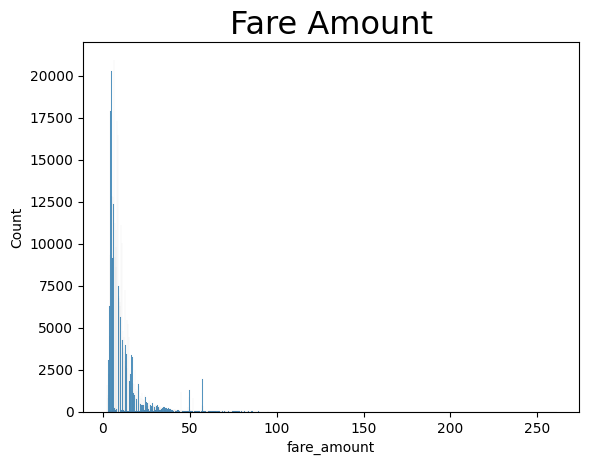

In [ ]:
sns.histplot(train_df , x = "fare_amount" )
plt.title("Fare Amount" , color = "Black" , size = 23)

What is the busiest day of the week?

In [ ]:
train_df["pickup_datetime_weekday"].value_counts().sort_values(ascending = False)

,count
pickup_datetime_weekday,
4,66613
5,65530
3,64887
2,62539
1,60576
6,56669
0,55649


What is the busiest time of the day?

  - Highest time is around 19th hour

In [ ]:
train_df["pickup_datetime_hour"].value_counts().sort_values(ascending = False)

,count
pickup_datetime_hour,
19,27241
18,25872
20,25537
21,24582
22,24144
14,21905
23,21397
13,21287
17,21226


In which month are fares the highest?

  - In the Month of 5th fare amount is highest

In [ ]:
train_df.groupby("pickup_datetime_month")["fare_amount"].sum().sort_values(ascending = False)

,fare_amount
pickup_datetime_month,
5,474170.25000
4,452513.34375
3,447959.50000
6,445795.68750
1,412085.46875
10,405111.59375
2,393834.31250
12,389207.75000
9,388029.68750


What is the average ride distance?

  - Seeem like average ride distance is around 3.3KM

In [ ]:
train_df["trip_distance"].mean()

np.float64(3.328505957524262)

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
241935,12.0,2012-09-28 13:03:00+00:00,-73.955757,40.781963,-73.972527,40.758938,1.0,2012,9,28,4,13,2.922040,20.957069,8.528936,18.678179,2.405415,6.034847
110152,6.5,2010-10-03 08:51:55+00:00,-73.973610,40.789894,-73.955612,40.773519,1.0,2010,10,3,6,8,2.367329,20.964090,6.878291,20.661837,0.913709,8.168095
471274,15.5,2013-07-31 22:30:00+00:00,-73.949165,40.773338,-73.989326,40.740577,1.0,2013,7,31,2,22,4.968033,20.939941,10.513262,16.597583,4.842328,3.559087
50645,4.5,2009-10-06 08:56:27+00:00,-73.965927,40.758778,-73.974403,40.750485,1.0,2009,10,6,1,8,1.165516,20.512577,8.945989,18.164250,3.348638,5.163188
461753,11.7,2009-02-06 15:14:00+00:00,-73.983681,40.776676,-73.973343,40.754727,1.0,2009,2,6,4,15,2.589791,20.723134,8.716270,18.427313,2.871437,5.603004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,14.9,2010-12-17 21:02:00+00:00,-73.967117,40.759018,-74.003250,40.740143,3.0,2010,12,17,4,21,3.694772,21.921392,11.620771,15.483449,5.512942,3.111571
259178,4.9,2011-10-07 21:58:11+00:00,-73.999046,40.734234,-73.986984,40.729487,1.0,2011,10,7,4,21,1.144529,20.146270,10.872972,16.408675,5.896834,2.691882
365838,22.5,2013-12-27 13:26:45+00:00,-73.965874,40.773830,-74.000473,40.717472,1.0,2013,12,27,4,13,6.907008,20.563538,12.529346,14.986469,7.563367,0.960943
131932,7.7,2011-08-17 00:08:00+00:00,-73.978043,40.783016,-73.963554,40.761622,5.0,2011,8,17,2,0,2.671960,20.563980,7.725451,19.489434,1.975800,6.701267


# **Prepare Dataset for Training**

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [ ]:
from sklearn.model_selection import train_test_split
train_df , val_df =  train_test_split(df , test_size = 0.2 , random_state=42)

In [ ]:
len(train_df) , len(val_df)

(443528, 110882)

Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

**Extract Inputs and Outputs**

In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = "fare_amount"

**Training**

In [ ]:
train_inputs = train_df[input_cols]
train_target= train_df[target_col]

In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
241935,-73.955757,40.781963,-73.972527,40.758938,1.0
110152,-73.973610,40.789894,-73.955612,40.773519,1.0
471274,-73.949165,40.773338,-73.989326,40.740577,1.0
50645,-73.965927,40.758778,-73.974403,40.750485,1.0
461753,-73.983681,40.776676,-73.973343,40.754727,1.0
...,...,...,...,...,...
110268,-73.967117,40.759018,-74.003250,40.740143,3.0
259178,-73.999046,40.734234,-73.986984,40.729487,1.0
365838,-73.965874,40.773830,-74.000473,40.717472,1.0
131932,-73.978043,40.783016,-73.963554,40.761622,5.0


In [ ]:
train_target

,fare_amount
241935,12.0
110152,6.5
471274,15.5
50645,4.5
461753,11.7
...,...
110268,14.9
259178,4.9
365838,22.5
131932,7.7


**Validation**

In [ ]:
val_inputs = val_df[input_cols]
val_target = val_df[target_col]

In [ ]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
491808,-73.984535,40.759209,-73.984535,40.759210,1.0
458930,-73.972641,40.743565,-73.976166,40.788377,1.0
388483,-73.964836,40.758568,-73.990288,40.748342,3.0
63343,-73.977982,40.746166,-73.908623,40.774917,1.0
181534,-73.952782,40.786564,-73.947510,40.775588,2.0
...,...,...,...,...,...
125284,-73.964569,40.760635,-73.975075,40.759573,1.0
133620,-73.980934,40.763363,-73.985123,40.760926,1.0
373155,-73.977760,40.761826,-73.988441,40.754262,2.0
474921,-73.981651,40.778988,-73.953613,40.785122,1.0


In [ ]:
val_target

,fare_amount
491808,5.3
458930,12.5
388483,9.5
63343,20.5
181534,5.3
...,...
125284,7.0
133620,4.5
373155,9.3
474921,9.7


**Test**

In [ ]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


# **Train Baseline Models**

 Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [ ]:
import numpy as np
class MeanRegressor():
  def fit(self , inputs , targets):
    self.mean = targets.mean()

  def predict(self , inputs):
    return np.full(inputs.shape[0] , self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs , train_target)

In [ ]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.344462, 11.344462, 11.344462, ..., 11.344462, 11.344462,
       11.344462], dtype=float32)

In [ ]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.344462, 11.344462, 11.344462, ..., 11.344462, 11.344462,
       11.344462], dtype=float32)

The evaluation metric for this competition is the root mean-squared error or RMSE. RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better. One nice property of RMSE is that the error is given in the units being measured, so you can tell very directly how incorrect the model might be on unseen data.

RMSE is given by:

RMSE=1n∑i=√1n(y^i−yi)2


In [ ]:
from sklearn.metrics import mean_squared_error , root_mean_squared_error
train_rmse = root_mean_squared_error(train_target, train_preds)

In [ ]:
train_rmse

9.809823989868164

In [ ]:
val_rmse = root_mean_squared_error(val_target , val_preds )
val_rmse

9.7508544921875

Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(train_inputs , train_target)

LinearRegression()

In [ ]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.27214011, 11.27213302, 11.27215506, ..., 11.27216867,
       11.628133  , 11.71729138])

In [ ]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.27214362, 11.27214246, 11.45015319, ..., 11.36113332,
       11.27213461, 11.71721794])

In [ ]:
train_rmse = root_mean_squared_error(train_target , train_preds)
train_rmse

9.808675432238369

In [ ]:
val_rmse = root_mean_squared_error(val_target , val_preds)
val_rmse

9.74977764118121

The linear regression model is off by $9.79, which isn't much better than simply predicting the average.

This is mainly because the training data  is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

# **Make Prediction**

In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [ ]:
test_preds = linreg_model.predict(test_inputs)
test_preds

array([11.27219171, 11.27225642, 11.27222302, ..., 11.71827683,
       11.71723808, 11.71707   ])

In [ ]:
submission_df = pd.read_csv(data_dir+ "/sample_submission.csv")

In [ ]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [ ]:
def generate_submission(test_preds , fname):
  sub_df = pd.read_csv(data_dir + "/sample_submission.csv")
  sub_df["fare_amount"] = test_preds
  sub_df.to_csv(fname , index = None)

In [ ]:
generate_submission(test_preds , "sub2.csv")

# **Feature Engineering**

- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks


Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour


In [ ]:
def add_dateparst(df , col):
  df[col + "_year"] = df[col].dt.year
  df[col + "_month"] = df[col].dt.month
  df[col + "_day"] = df[col].dt.day
  df[col + "_weekday"] = df[col].dt.weekday
  df[col + "_hour"] = df[col].dt.hour

In [ ]:
add_dateparst(train_df ,"pickup_datetime")

In [ ]:
add_dateparst(val_df ,"pickup_datetime")

In [ ]:
add_dateparst(test_df ,"pickup_datetime")

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
241935,12.0,2012-09-28 13:03:00+00:00,-73.955757,40.781963,-73.972527,40.758938,1.0,2012,9,28,4,13
110152,6.5,2010-10-03 08:51:55+00:00,-73.973610,40.789894,-73.955612,40.773519,1.0,2010,10,3,6,8
471274,15.5,2013-07-31 22:30:00+00:00,-73.949165,40.773338,-73.989326,40.740577,1.0,2013,7,31,2,22
50645,4.5,2009-10-06 08:56:27+00:00,-73.965927,40.758778,-73.974403,40.750485,1.0,2009,10,6,1,8
461753,11.7,2009-02-06 15:14:00+00:00,-73.983681,40.776676,-73.973343,40.754727,1.0,2009,2,6,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,14.9,2010-12-17 21:02:00+00:00,-73.967117,40.759018,-74.003250,40.740143,3.0,2010,12,17,4,21
259178,4.9,2011-10-07 21:58:11+00:00,-73.999046,40.734234,-73.986984,40.729487,1.0,2011,10,7,4,21
365838,22.5,2013-12-27 13:26:45+00:00,-73.965874,40.773830,-74.000473,40.717472,1.0,2013,12,27,4,13
131932,7.7,2011-08-17 00:08:00+00:00,-73.978043,40.783016,-73.963554,40.761622,5.0,2011,8,17,2,0


**Add Distance Between Pickup and Drop**

We can use the haversine distance:
- https://en.wikipedia.org/wiki/Haversine_formula


In [ ]:
def haversine_np(lon1 , lat1 , lon2 , lat2):

  lon1 , lat1 , lon2 , lat2 = map(np.radians , [lon1 , lat1 , lon2 , lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c
  return km



In [ ]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
add_trip_distance(train_df)

In [ ]:
add_trip_distance(val_df)

In [ ]:
add_trip_distance(test_df)

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
241935,12.0,2012-09-28 13:03:00+00:00,-73.955757,40.781963,-73.972527,40.758938,1.0,2012,9,28,4,13,2.922040
110152,6.5,2010-10-03 08:51:55+00:00,-73.973610,40.789894,-73.955612,40.773519,1.0,2010,10,3,6,8,2.367329
471274,15.5,2013-07-31 22:30:00+00:00,-73.949165,40.773338,-73.989326,40.740577,1.0,2013,7,31,2,22,4.968033
50645,4.5,2009-10-06 08:56:27+00:00,-73.965927,40.758778,-73.974403,40.750485,1.0,2009,10,6,1,8,1.165516
461753,11.7,2009-02-06 15:14:00+00:00,-73.983681,40.776676,-73.973343,40.754727,1.0,2009,2,6,4,15,2.589791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,14.9,2010-12-17 21:02:00+00:00,-73.967117,40.759018,-74.003250,40.740143,3.0,2010,12,17,4,21,3.694772
259178,4.9,2011-10-07 21:58:11+00:00,-73.999046,40.734234,-73.986984,40.729487,1.0,2011,10,7,4,21,1.144529
365838,22.5,2013-12-27 13:26:45+00:00,-73.965874,40.773830,-74.000473,40.717472,1.0,2013,12,27,4,13,6.907008
131932,7.7,2011-08-17 00:08:00+00:00,-73.978043,40.783016,-73.963554,40.761622,5.0,2011,8,17,2,0,2.671960


Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center


In [ ]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 309 ms, sys: 3.71 ms, total: 313 ms
Wall time: 334 ms


In [ ]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
466636,4.1,2011-04-29 07:55:26+00:00,-74.002060,40.750896,-74.001961,40.745706,2.0,2011,4,29,4,7,0.576823,22.144186,11.314246,15.817973,4.965830,3.739229
394279,23.5,2012-10-07 00:17:00+00:00,-73.989998,40.772583,-73.996719,40.726032,1.0,2012,10,7,6,0,5.203728,20.689568,11.776120,15.516547,6.567448,1.860273
48881,8.5,2011-04-07 22:10:10+00:00,-74.005653,40.741016,-73.975403,40.758353,2.0,2011,4,7,3,22,3.193288,21.106889,8.779476,18.430899,2.554258,5.855668
349775,4.5,2013-11-17 09:25:00+00:00,-73.968788,40.764210,-73.966423,40.770552,2.0,2013,11,17,6,9,0.732632,21.400357,7.809419,19.701844,1.019824,7.407746
130631,6.1,2010-11-30 09:05:31+00:00,-73.991615,40.759750,-73.988960,40.753764,1.0,2010,11,30,1,9,0.701946,21.720818,10.011283,17.180917,3.579791,4.902473


 **Remove Outliers and Invalid Data**

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000,443525.000000
mean,11.344462,-72.512596,39.929352,-72.490334,39.906149,1.686527,2011.742702,6.267164,15.700195,3.040077,13.505879,21.119349,196.642402,185.865557,194.928300,180.918960,182.418460
std,9.808430,14.648813,11.421376,13.006611,11.823192,1.314302,1.862331,3.437014,8.670268,1.949379,6.516687,385.349392,1234.948703,1238.035303,1239.901258,1239.770769,1239.870916
min,-63.000000,-3344.155273,-2099.729248,-3047.750000,-3114.419380,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.241432,0.167940,0.274843,0.039286,0.011996
25%,6.000000,-73.992073,40.734924,-73.991394,40.733987,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.207984,20.536390,8.343671,16.507644,2.170957,3.646146
50%,8.500000,-73.981819,40.752632,-73.980164,40.753188,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.108762,21.206946,9.578050,18.019170,3.809074,5.569200
75%,12.500000,-73.967079,40.767113,-73.963654,40.768096,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.869955,21.957203,11.122310,19.973920,6.059591,7.834051
max,400.000000,2080.490234,3347.260498,1326.914673,3306.705933,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,15227.702722,18670.696810,18685.831044,18676.069011,18686.134888,18678.711586


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6

In [ ]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [ ]:
train_df = remove_outliers(train_df)

In [ ]:
val_df = remove_outliers(val_df)

# **Train & Evaluate Different Models**

We'll train each of the following & submit predictions to Kaggle:

- Ridge Regression
- Random Forests
- Gradient Boosting
- Decision Tree

**Split Inputs and Targets**

In [ ]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [ ]:
target_col = "fare_amount"

In [ ]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_target = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13,2.321720,20.574949,9.760151,17.346891,4.239318,4.218800
1,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13,2.423889,21.550981,11.315998,15.789650,5.382910,3.098180
2,-73.982521,40.751259,-73.979652,40.746139,1.0,2011,10,8,5,11,0.618009,20.594007,9.526878,17.576952,3.946866,4.514444
3,-73.981163,40.767807,-73.990448,40.751635,1.0,2012,12,1,5,21,1.959910,21.689160,10.195201,16.969532,3.844222,4.636742
4,-73.966049,40.789776,-73.988564,40.744427,1.0,2012,12,1,5,21,5.383931,21.113870,10.295947,16.808312,4.434000,3.967057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0,2015,5,10,6,12,2.123367,21.507015,6.880891,21.014938,0.645636,8.809757
9910,-73.945511,40.803600,-73.960213,40.776371,6.0,2015,1,12,0,17,3.268916,21.462229,7.254930,20.464521,0.420324,8.229248
9911,-73.991600,40.726608,-73.789742,40.647011,6.0,2015,4,19,6,20,19.171439,1.169152,16.084441,32.772347,20.734211,19.933692
9912,-73.985573,40.735432,-73.939178,40.801731,6.0,2015,1,31,5,1,8.338278,22.402436,6.138515,23.410822,3.200773,11.556237


**Let's define fucntion to evalute model and generate test predictions**

In [ ]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = root_mean_squared_error(train_target, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = root_mean_squared_error(val_target, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

In [ ]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state=42 , alpha=0.9)

In [ ]:
%%time
model1.fit(train_inputs , train_target)

CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 155 ms


Ridge(alpha=0.9, random_state=42)

In [ ]:
evaluate(model1)

(5.10927939051802,
 5.060686737738835,
 array([ 9.85466698,  6.8942935 , 14.7013476 , ..., 17.45302083,
         8.19749924,  8.68315597]),
 array([ 4.56747632, 14.08666821, 10.77678217, ...,  6.65587044,
         8.08507296, 17.34923927]))

In [ ]:
predict_and_submit(model1 , "ridge_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.170917
1,2015-01-27 13:08:24.0000003,11.447528
2,2011-10-08 11:53:44.0000002,5.491039
3,2012-12-01 21:12:12.0000002,8.730576
4,2012-12-01 21:12:12.0000003,14.348684
...,...,...
9909,2015-05-10 12:37:51.0000002,9.048474
9910,2015-01-12 17:05:51.0000001,11.232310
9911,2015-04-19 20:44:15.0000001,47.906543
9912,2015-01-31 01:05:19.0000005,22.304240


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(max_depth=10 , n_jobs=-1 , random_state=42 , n_estimators=50)

In [ ]:
%%time
model2.fit(train_inputs  , train_target)

CPU times: user 9min, sys: 1.51 s, total: 9min 2s
Wall time: 5min 58s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model2)

(3.576403310293266,
 3.9976308205081637,
 array([10.69908611,  8.31743559, 15.45023897, ..., 21.28401067,
         8.18991948,  5.18916252]),
 array([ 9.24303814, 12.04465764, 10.63059751, ...,  6.21539827,
         8.26499006, 17.83043807]))

In [ ]:
predict_and_submit(model2 , "rf_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.607184
1,2015-01-27 13:08:24.0000003,10.630598
2,2011-10-08 11:53:44.0000002,5.121043
3,2012-12-01 21:12:12.0000002,8.403312
4,2012-12-01 21:12:12.0000003,13.816892
...,...,...
9909,2015-05-10 12:37:51.0000002,8.961535
9910,2015-01-12 17:05:51.0000001,12.131915
9911,2015-04-19 20:44:15.0000001,55.583641
9912,2015-01-31 01:05:19.0000005,22.445715


**Gradient Boosting**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror' , n_estimator = 100)

In [ ]:
%%time
model3.fit(train_inputs , train_target)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 8.86 s, sys: 59.5 ms, total: 8.92 s
Wall time: 4.71 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, ...)

In [ ]:
evaluate(model3)

(3.161956310272217,
 3.9021904468536377,
 array([11.992061 ,  7.9727583, 13.984547 , ..., 22.252626 ,  8.32993  ,
         5.7389045], dtype=float32),
 array([ 9.652845 , 12.966296 , 12.792313 , ...,  6.9353213,  9.407492 ,
        16.26467  ], dtype=float32))

In [ ]:
predict_and_submit(model3 ,"xgb_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.579693
1,2015-01-27 13:08:24.0000003,11.815858
2,2011-10-08 11:53:44.0000002,4.852398
3,2012-12-01 21:12:12.0000002,8.503675
4,2012-12-01 21:12:12.0000003,16.544617
...,...,...
9909,2015-05-10 12:37:51.0000002,8.849944
9910,2015-01-12 17:05:51.0000001,11.092917
9911,2015-04-19 20:44:15.0000001,55.118965
9912,2015-01-31 01:05:19.0000005,19.550594


**Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# ?DecisionTreeRegressor

In [ ]:
model4 = DecisionTreeRegressor(
        random_state=42 ,
        max_depth=20,
        max_leaf_nodes=10,
        criterion="squared_error",
        min_samples_split=10,
        max_features=10



                              )

In [ ]:
model4.fit(train_inputs , train_target)

DecisionTreeRegressor(max_depth=20, max_features=10, max_leaf_nodes=10,
                      min_samples_split=10, random_state=42)

In [ ]:
evaluate(model4)

(5.117178092384083,
 5.284806414687044,
 array([ 8.75215215,  8.75215215, 13.46688619, ..., 13.46688619,
         8.75215215,  6.2345112 ]),
 array([ 6.2345112 , 13.46688619,  8.75215215, ...,  6.2345112 ,
         8.75215215, 13.46688619]))

# **Tune Hyperparmeters**

We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators , max_depth m learning_rate

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

Let's define a helper function for trying different hyperparameters.

In [ ]:
import matplotlib.pyplot as plt
def test_params(modelclass , **params):
  model = modelclass(**params).fit(train_inputs , train_target)
  train_rmse = root_mean_squared_error(model.predict(train_inputs) , train_target)
  val_rmse = root_mean_squared_error(model.predict(val_inputs) , val_target)
  return train_rmse , val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):

    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])



In [ ]:
best_params = {
    "random_state" : 42,
    "n_jobs":-1,
    "objective": "reg:squarederror"
}

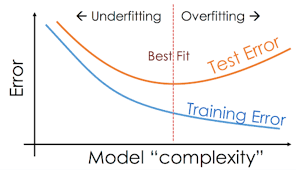

Number of trees

CPU times: user 1min 31s, sys: 307 ms, total: 1min 31s
Wall time: 60 s


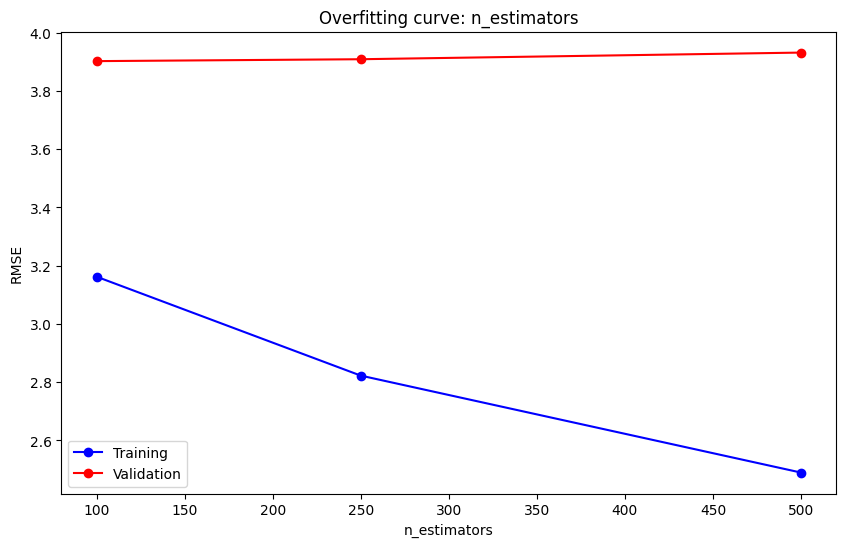

In [ ]:
%%time
test_param_and_plot(XGBRegressor , "n_estimators" , [100 , 250 , 500] , **best_params)

**Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.**

In [ ]:
best_params["n_estimators"] = 250

Max Depth

CPU times: user 1min, sys: 210 ms, total: 1min
Wall time: 38.8 s


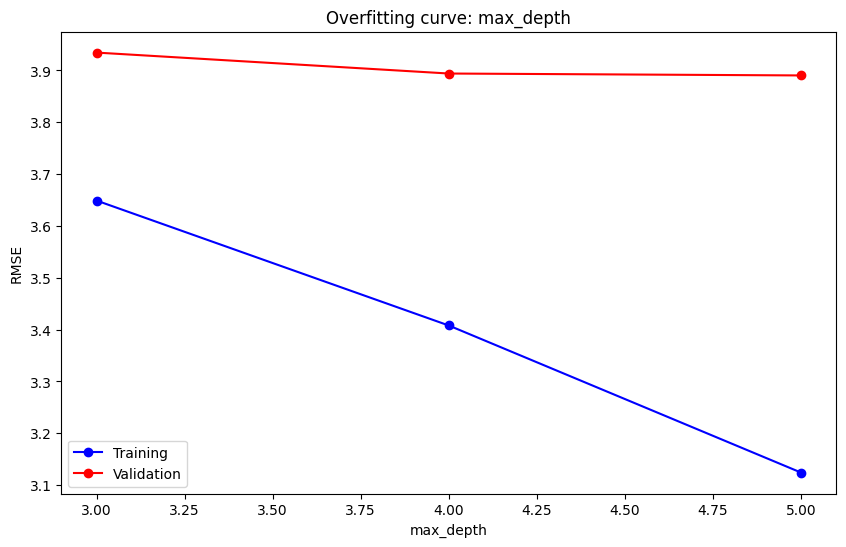

In [ ]:
%%time
test_param_and_plot(XGBRegressor , "max_depth" , [3,4,5] , **best_params)

In [ ]:
best_params["max_depth"] = 5

**Learning Rate**

CPU times: user 1min 17s, sys: 274 ms, total: 1min 18s
Wall time: 53.8 s


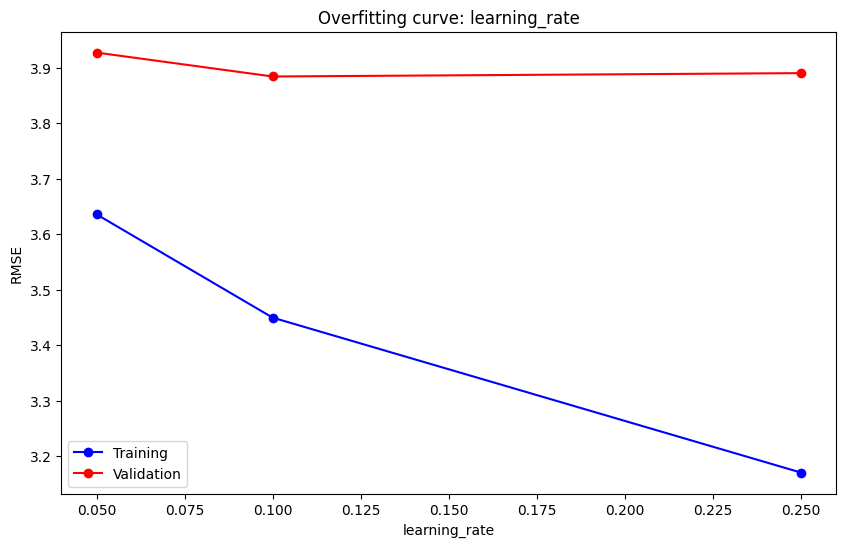

In [ ]:
%%time
test_param_and_plot(XGBRegressor , "learning_rate" , [0.05,0.1,0.25] , **best_params)

In [ ]:
best_params["learning_rate"] = 0.25

**Other Parameters**

Similarly we can experiment with other parameters.

Here's a set of parameters that works well:

In [ ]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1,
                               subsample=0.8, colsample_bytree=0.8)

In [ ]:
%%time
xgb_model_final.fit(train_inputs , train_target)

CPU times: user 39.1 s, sys: 138 ms, total: 39.2 s
Wall time: 29.3 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(xgb_model_final)

(3.2294304370880127,
 3.8768560886383057,
 array([11.8594055,  7.553128 , 14.978971 , ..., 22.198008 ,  8.592234 ,
         5.6986103], dtype=float32),
 array([ 8.140062, 12.567927, 12.051597, ...,  7.027994,  8.774758,
        15.950258], dtype=float32))